In [8]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

In [2]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    '/New Plant Diseases Dataset(Augmented)/train/',
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

validation_generator = validation_datagen.flow_from_directory(
    'New Plant Diseases Dataset(Augmented)/valid/',
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

Found 70295 images belonging to 38 classes.
Found 17572 images belonging to 38 classes.


In [9]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(38, activation='softmax')  # 38 classes
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [10]:
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    epochs=50,
    callbacks=[early_stopping]
)

Epoch 1/50


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


   1/2196 ━━━━━━━━━━━━━━━━━━━━ 8:02:19 13s/step - accuracy: 0.0625 - loss: 3.6353

I0000 00:00:1720023115.891678     168 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1720023115.915842     168 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


1107/2196 ━━━━━━━━━━━━━━━━━━━━ 7:38 421ms/step - accuracy: 0.3134 - loss: 2.4899

W0000 00:00:1720023581.121972     167 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


2196/2196 ━━━━━━━━━━━━━━━━━━━━ 0s 420ms/step - accuracy: 0.4361 - loss: 1.9988

W0000 00:00:1720024039.296042     167 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


2196/2196 ━━━━━━━━━━━━━━━━━━━━ 1066s 479ms/step - accuracy: 0.4361 - loss: 1.9984 - val_accuracy: 0.7967 - val_loss: 0.6324
Epoch 2/50
   1/2196 ━━━━━━━━━━━━━━━━━━━━ 1:11 33ms/step - accuracy: 0.7812 - loss: 0.5856

/opt/conda/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


2196/2196 ━━━━━━━━━━━━━━━━━━━━ 1s 578us/step - accuracy: 0.7812 - loss: 0.5856 - val_accuracy: 1.0000 - val_loss: 0.0939
Epoch 3/50


W0000 00:00:1720024169.546540     166 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


2196/2196 ━━━━━━━━━━━━━━━━━━━━ 489s 222ms/step - accuracy: 0.8213 - loss: 0.5588 - val_accuracy: 0.9026 - val_loss: 0.2980
Epoch 4/50
2196/2196 ━━━━━━━━━━━━━━━━━━━━ 0s 10us/step - accuracy: 0.9062 - loss: 0.3640 - val_accuracy: 0.7500 - val_loss: 0.5283
Epoch 5/50
2196/2196 ━━━━━━━━━━━━━━━━━━━━ 466s 211ms/step - accuracy: 0.8742 - loss: 0.3882 - val_accuracy: 0.9199 - val_loss: 0.2450
Epoch 6/50
2196/2196 ━━━━━━━━━━━━━━━━━━━━ 0s 9us/step - accuracy: 0.8750 - loss: 0.4343 - val_accuracy: 1.0000 - val_loss: 0.1489
Epoch 7/50
2196/2196 ━━━━━━━━━━━━━━━━━━━━ 463s 210ms/step - accuracy: 0.8944 - loss: 0.3238 - val_accuracy: 0.9260 - val_loss: 0.2383
Epoch 8/50
2196/2196 ━━━━━━━━━━━━━━━━━━━━ 0s 54us/step - accuracy: 0.8438 - loss: 0.4683 - val_accuracy: 1.0000 - val_loss: 0.0055
Epoch 9/50
2196/2196 ━━━━━━━━━━━━━━━━━━━━ 467s 212ms/step - accuracy: 0.9102 - loss: 0.2770 - val_accuracy: 0.9364 - val_loss: 0.1972
Epoch 10/50
2196/2196 ━━━━━━━━━━━━━━━━━━━━ 0s 8us/step - accuracy: 0.8750 - loss: 0

In [11]:
loss, accuracy = model.evaluate(validation_generator)
print(f'Validation Loss: {loss}')
print(f'Validation Accuracy: {accuracy}')

550/550 ━━━━━━━━━━━━━━━━━━━━ 31s 57ms/step - accuracy: 0.9417 - loss: 0.1985
Validation Loss: 0.19807910919189453
Validation Accuracy: 0.9407580494880676


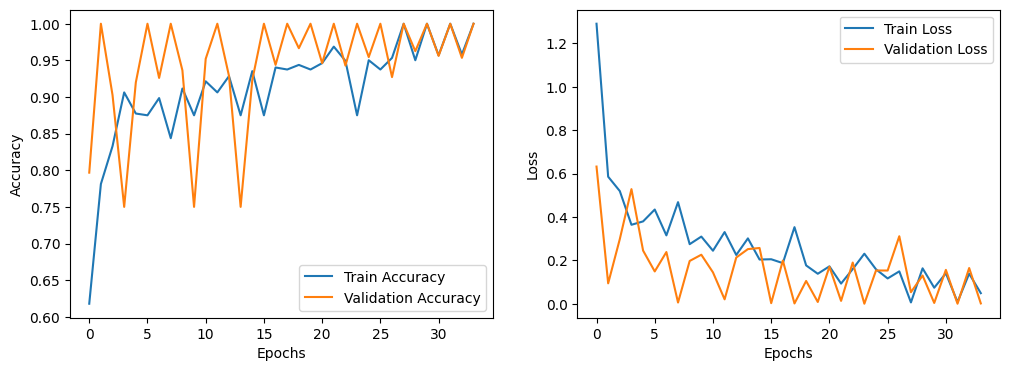

In [12]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [13]:
model.save('plant_disease_model.h5')